## Paired-t Test

In [1]:
import pandas as pd
from scipy.stats import ttest_rel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
a_df = pd.read_csv("results_with_code_that_finally_works/test_predictions_ground_truth_0.45.tsv", sep="\t")
b_df = pd.read_csv("results_with_code_that_finally_works/test_predictions_with_reasonings_0.48.tsv", sep="\t")

In [3]:
a_df.head()

,index,src,mt,zmean,source_file,root_folder,file_type,global_index,predicted_zmean
0,5456,The temple has a garbhagriha (sanctum sanctoru...,"मंदिर में एक गर्भगृह (गर्भगृह) है, जिसमें देवत...",-0.417612,en-hi.tsv,wmt23_train,zmean,19456,-0.2620
1,2530,ප්‍රංශ විප්ලවය පිළිබඳ සැකය වැඩෙත්ම එයට සහාය දැ...,The suspicions of the French Revolution that s...,0.480491,si-en.tsv,wmt21_train,zmean,133292,1.0844
2,4131,"Поступай с другими так, как ты бы хотел, чтобы...",Do to others as you would like them to do to you.,0.484324,ru-en.tsv,wmt21_train,zmean,113893,-0.3867
3,4289,धान पोसिया परिवारअन्तर्गत पर्दछ अनि यो एकवर्षे...,"It is under the rice posia family, and it is a...",0.689497,ne-en.tsv,wmt21_train,zmean,142051,-0.0342
4,5008,Despite this Mithridates joined Antiochus Hier...,尽管如此 ， 米特里达斯还是加入了反对塞卢库斯的安蒂奥丘斯 · 希拉克斯。,0.546323,en-zh.tsv,wmt22_fixed,zmean,59008,0.4935


In [4]:
errors_a = (a_df['predicted_zmean'] - a_df['zmean']).abs()
errors_b = (b_df['predicted_zmean'] - b_df['zmean']).abs()

In [5]:
print(type(errors_a))

<class 'pandas.core.series.Series'>


In [6]:
errors_a.head()

0    0.155612
1    0.603909
2    0.871024
3    0.723697
4    0.052823
dtype: float64

In [7]:
#Check NaN 
print("errors_a NaNs:", errors_a.isna().sum())
print("errors_b NaNs:", errors_b.isna().sum())
differences = errors_a - errors_b
nan_indices = differences[differences.isna()].index.tolist()

errors_a NaNs: 40
errors_b NaNs: 4


In [13]:
print(nan_indices)
print(a_df.loc[nan_indices][['predicted_zmean', 'zmean']])
print(b_df.loc[nan_indices][['predicted_zmean', 'zmean']])

[614, 1015, 1504, 1516, 1568, 1624, 1778, 2517, 3136, 3716, 4024, 4470, 5042, 5252, 5553, 6476, 7137, 7200, 7730, 7859, 7864, 7985, 8466, 8789, 8949, 8952, 9019, 9150, 9155, 9489, 9947, 10044, 10521, 11313, 11498, 11572, 12329, 12346, 12350, 12420, 12927, 13154, 13155, 14413]
       predicted_zmean     zmean
614                NaN -2.176119
1015               NaN -0.636905
1504               NaN  0.307589
1516               NaN -0.292020
1568               NaN -2.365251
1624               NaN -2.090421
1778            0.9350  0.634806
2517               NaN -1.308924
3136               NaN  0.268997
3716               NaN  0.614327
4024               NaN -2.365251
4470            0.4572 -0.156482
5042               NaN -0.260895
5252               NaN  0.047440
5553               NaN -2.365251
6476               NaN -0.262080
7137           -0.1317  0.236988
7200               NaN -0.161689
7730               NaN -2.200685
7859               NaN -1.840380
7864               NaN -0.3661

In [8]:
#Filter out NaN value
a_df_cleaned = a_df.drop(index=nan_indices)
b_df_cleaned = b_df.drop(index=nan_indices)

a_df_cleaned.head()

a_preds_clean = a_df_cleaned['predicted_zmean']
b_preds_clean = b_df_cleaned['predicted_zmean']

a_errors = (a_preds_clean - a_df_cleaned["zmean"]).abs()
b_errors = (b_preds_clean - b_df_cleaned["zmean"]).abs()

In [9]:
error_differences = a_errors - b_errors

In [12]:
if len(error_differences) < 5000:
    shapiro_stat, shapiro_p = stats.shapiro(error_differences)
    print(f"Shapiro-Wilk test: sample sum={shapiro_stat:.4f}, p value={shapiro_p:.4f}")
    if shapiro_p > 0.05:
        print("The difference is approximately normally distributed: (p > 0.05)")
    else:
        print("The differences may not be normally distributed: (p ≤ 0.05)")

ks_stat, ks_p = stats.kstest(error_differences, 'norm', 
                            args=(np.mean(error_differences), np.std(error_differences)))
print(f"K-S检验: 统计量={ks_stat:.4f}, p值={ks_p:.4f}")
print(f"样本量: {len(error_differences)}")
print(f"差值均值: {np.mean(error_differences):.6f}")
print(f"差值标准差: {np.std(error_differences, ddof=1):.6f}")
print(f"差值中位数: {np.median(error_differences):.6f}")

K-S检验: 统计量=0.0639, p值=0.0000
样本量: 14433
差值均值: -0.134030
差值标准差: 0.788146
差值中位数: -0.074000


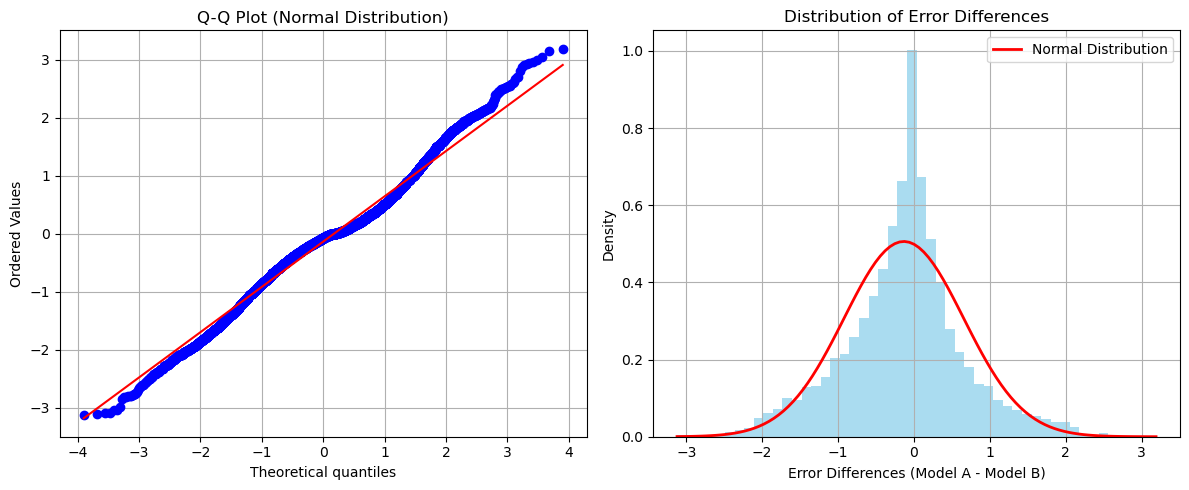

In [13]:
# 可视化检验正态性
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q图
stats.probplot(error_differences, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot (Normal Distribution)")
axes[0].grid(True)

# 直方图
axes[1].hist(error_differences, bins=50, density=True, alpha=0.7, color='skyblue')
axes[1].set_xlabel("Error Differences (Model A - Model B)")
axes[1].set_ylabel("Density")
axes[1].set_title("Distribution of Error Differences")
axes[1].grid(True)

# 叠加正态分布曲线
x = np.linspace(error_differences.min(), error_differences.max(), 100)
normal_curve = stats.norm.pdf(x, np.mean(error_differences), np.std(error_differences))
axes[1].plot(x, normal_curve, 'r-', linewidth=2, label='Normal Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()

In [14]:
t_stat, p_value = stats.ttest_rel(a_errors, b_errors)
print(f"t统计量: {t_stat:.4f}")
print(f"p值: {p_value:.4f}")
print(f"自由度: {len(error_differences) - 1}")
mean_diff = np.mean(error_differences)
std_diff = np.std(error_differences, ddof=1)
se_diff = std_diff / np.sqrt(len(error_differences))
t_critical = stats.t.ppf(0.975, len(error_differences) - 1)  # 95%置信区间
ci_lower = mean_diff - t_critical * se_diff
ci_upper = mean_diff + t_critical * se_diff
print(f"\n=== 结果解释 ===")
print(f"平均误差差异: {mean_diff:.6f}")
print(f"95%置信区间: ({ci_lower:.6f}, {ci_upper:.6f})")

t统计量: -20.4302
p值: 0.0000
自由度: 14432

=== 结果解释 ===
平均误差差异: -0.134030
95%置信区间: (-0.146889, -0.121170)


In [15]:
alpha = 0.05
if p_value < alpha:
    print(f"\n结论: p值({p_value:.4f}) < {alpha}，拒绝零假设")
    print("两个模型的预测精度存在显著差异")
    if mean_diff > 0:
        print("模型B的平均误差显著小于模型A (模型B表现更好)")
    else:
        print("模型A的平均误差显著小于模型B (模型A表现更好)")
else:
    print(f"\n结论: p值({p_value:.4f}) ≥ {alpha}，接受零假设")
    print("两个模型的预测精度无显著差异")

# 效应量 (Cohen's d)
cohens_d = mean_diff / std_diff
print(f"\nCohen's d (效应量): {cohens_d:.4f}")
if abs(cohens_d) < 0.2:
    print("效应量很小")
elif abs(cohens_d) < 0.5:
    print("效应量中等")
elif abs(cohens_d) < 0.8:
    print("效应量较大")
else:
    print("效应量很大")


结论: p值(0.0000) < 0.05，拒绝零假设
两个模型的预测精度存在显著差异
模型A的平均误差显著小于模型B (模型A表现更好)

Cohen's d (效应量): -0.1701
效应量很小


In [28]:
t_stat, p_value = ttest_rel(a_errors, b_errors)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -20.43018495144714
P-value: 1.7664962193159063e-91


## Pearson r by ranges

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

In [30]:
a_df = pd.read_csv("results_with_code_that_finally_works/test_predictions_ground_truth_0.45.tsv", sep="\t")
b_df = pd.read_csv("results_with_code_that_finally_works/test_predictions_with_reasonings_0.48.tsv", sep="\t")

In [43]:
def get_quality_range(z):
    if z > 2.0:
        return "High Quality in long tail end (>2.0)"
    elif z > 1.0 and z <= 2.0:
        return "High Quality in range (1.0~2.0]"
    elif z > 0.0 and z <= 1.0:
        return "Medium High Quality (0.0~1.0]"
    elif z > -1.0 and z<= 0.0:
        return "Medium Low Quality (-1.0~0.0]"
    elif z > -2.0 and z <= -1.0:
        return "Low Quality (-2.0~-1.0]"
    else:
        return "Very Low Quality (<=-2.0)"

In [44]:
a_df["quality_range"] = a_df["zmean"].apply(get_quality_range)
b_df["quality_range"] = b_df["zmean"].apply(get_quality_range)

In [45]:
def analyze_by_range(df, model_name):
    results = []
    for r, group in df.groupby("quality_range"):
        original_samples = len(group)
        group = group.dropna(subset=["predicted_zmean", "zmean"])
        clean_samples = len(group)
        removed_samples = original_samples - clean_samples
        if clean_samples < 2:  #Number of samples insufficient
            pearson_val = np.nan
        else:
            pearson_val, _ = pearsonr(group["predicted_zmean"], group["zmean"])
        rmse_val = np.sqrt(mean_squared_error(group["zmean"], group["predicted_zmean"]))
        results.append({
            "Quality Range": r,
            "Original Samples": original_samples,
            "Removed NaN Samples": removed_samples,
            "Final Samples": clean_samples,
            f"{model_name} Pearson r": pearson_val,
            f"{model_name} RMSE": rmse_val
        })
    return pd.DataFrame(results)

In [46]:
a_results = analyze_by_range(a_df, "Gold Label")
b_results = analyze_by_range(b_df, "GPT Reasoning")

In [49]:
bracket_order = [
    "High Quality in long tail end (>2.0)",
    "High Quality in range (1.0~2.0]",
    "Medium High Quality (0.0~1.0]",
    "Medium Low Quality (-1.0~0.0]",
    "Low Quality (-2.0~-1.0]",
    "Very Low Quality (<=-2.0)"
]
a_results["Quality Range"] = pd.Categorical(a_results["Quality Range"], categories=bracket_order, ordered=True)
a_results = a_results.sort_values("Quality Range")
print(a_results)

                          Quality Range  Original Samples  \
0  High Quality in long tail end (>2.0)                57   
1       High Quality in range (1.0~2.0]               829   
3         Medium High Quality (0.0~1.0]              7553   
4         Medium Low Quality (-1.0~0.0]              4177   
2               Low Quality (-2.0~-1.0]              1551   
5             Very Low Quality (<=-2.0)               310   

   Removed NaN Samples  Final Samples  Gold Label Pearson r  Gold Label RMSE  
0                    0             57              0.229452         1.376943  
1                    0            829              0.126990         0.645032  
3                    6           7547              0.348242         0.493927  
4                   11           4166              0.096448         0.811964  
2                    7           1544              0.195663         1.434637  
5                   16            294             -0.199141         2.442445  


In [50]:
b_results["Quality Range"] = pd.Categorical(b_results["Quality Range"], categories=bracket_order, ordered=True)
b_results = b_results.sort_values("Quality Range")
print(b_results)

                          Quality Range  Original Samples  \
0  High Quality in long tail end (>2.0)                57   
1       High Quality in range (1.0~2.0]               829   
3         Medium High Quality (0.0~1.0]              7553   
4         Medium Low Quality (-1.0~0.0]              4177   
2               Low Quality (-2.0~-1.0]              1551   
5             Very Low Quality (<=-2.0)               310   

   Removed NaN Samples  Final Samples  GPT Reasoning Pearson r  \
0                    0             57                 0.490130   
1                    0            829                 0.018229   
3                    3           7550                 0.179718   
4                    1           4176                 0.258838   
2                    0           1551                 0.189614   
5                    0            310                -0.195312   

   GPT Reasoning RMSE  
0            2.146315  
1            1.354755  
3            0.933978  
4            

## Pearson r by sentence length

In [57]:
a_df = a_df.dropna(subset=["src", "predicted_zmean", "zmean"]).copy()
b_df = b_df.dropna(subset=["src", "predicted_zmean", "zmean"]).copy()

a_df["src_len"] = a_df["src"].apply(lambda x: len(str(x).split()))
b_df["src_len"] = b_df["src"].apply(lambda x: len(str(x).split()))

q33 = a_df["src_len"].quantile(0.33)
q66 = a_df["src_len"].quantile(0.66)

print(f"Length at 33% percentile: {q33}, 66% percentile: {q66}")
print(f"Shortest sentence: {a_df['src_len'].min()}, Longest sentence: {a_df['src_len'].max()}, Average Length: {a_df['src_len'].mean():.2f}")
print("Shortest sentence:", a_df.loc[shortest_idx, "src"])
print("Longest sentence:", a_df.loc[longest_idx, "src"])

Length at 33% percentile: 12.0, 66% percentile: 18.0
Shortest sentence: 1, Longest sentence: 127, Average Length: 16.44
Shortest sentence: БОГ=ЖИЗНЬ-ИСТИНА
Longest sentence: Having regard to the total scenario emerging from the record of the case and the findings recorded by the Courts below on the issues such as location of land, its potentiality, surroundings, the rate of the adjacent land determined by the Courts, the condition of the acquired underdeveloped lands, the expenditure required to develop the acquired land to start the activities, per cent of deductions to be made, its proximity to the various places in the nearby town (Faridabad), and lastly, the fact that the appellants failed to file any sale deed of any parcel of land (be that of small piece of land or big) sold in the near proximity of the acquired land, the fair market value of the lands in question as on 04.11.1977


In [58]:
def length_bracket(length):
    if length <= q33:
        return "Short"
    elif length <= q66:
        return "Medium"
    else:
        return "Long"

a_df["length_group"] = a_df["src_len"].apply(length_bracket)
b_df["length_group"] = b_df["src_len"].apply(length_bracket)

In [60]:
import math
def calc_metrics(df):
    results = []
    for group, sub_df in df.groupby("length_group"):
        if len(sub_df) > 1:
            r, _ = pearsonr(sub_df["predicted_zmean"], sub_df["zmean"])
            rmse = math.sqrt(mean_squared_error(sub_df["zmean"], sub_df["predicted_zmean"]))
            results.append({
                "Group": group,
                "Samples": len(sub_df),
                "Pearson r": round(r, 4),
                "RMSE": round(rmse, 4)
            })
    return pd.DataFrame(results)

print("\nMetrices for Model finetuned with Gold lable:")
display(calc_metrics(a_df))

print("\nMetrices for Model finetuned with GPT Reasoning:")
display(calc_metrics(b_df))


Metrices for Model finetuned with Gold lable:


,Group,Samples,Pearson r,RMSE
0,Long,4721,0.3952,0.7347
1,Medium,4168,0.4289,0.8513
2,Short,5548,0.4964,0.8909



Metrices for Model finetuned with GPT Reasoning:


,Group,Samples,Pearson r,RMSE
0,Long,4742,0.4526,0.8773
1,Medium,4181,0.4635,1.0042
2,Short,5550,0.5173,1.0463


## Qualitative Cases

In [66]:
#NaN values are already dropped in cell 57
a_df["diff_gold"] = a_df["predicted_zmean"] - a_df["zmean"]
b_df["diff_gold"] = b_df["predicted_zmean"] - b_df["zmean"]

b_subset = b_df[["src", "predicted_zmean", "diff_gold", "gpt_explanation", "index", "source_file", "mt", "zmean"]].copy()
a_subset = a_df[["src", "predicted_zmean", "diff_gold", "index", "source_file", "mt", "zmean"]].copy()

#calculate overestimation
overestimation_a = a_df.sort_values(by="diff_gold", ascending=False).head(20)
overestimation_b = b_df.sort_values(by="diff_gold", ascending=False).head(20)

#calculate underestimation
underestimation_a = a_df.sort_values(by="diff_gold", ascending=True).head(20)
underestimation_b = b_df.sort_values(by="diff_gold", ascending=True).head(20)

merged_df = a_df.merge(
    b_subset,
    on="src",
    suffixes=("_baseline", "_enhanced"),
    how="inner"
)

In [71]:
merged_df["abs_diff_models"] = (merged_df["predicted_zmean_baseline"] - merged_df["predicted_zmean_enhanced"]).abs()

largest_disagreement = merged_df.sort_values(by="abs_diff_models", ascending=False).head(20)
print(largest_disagreement.columns.tolist())
# 定义保存列，包含idx和source_file，以及GPT理由
cols_a = ["index", "source_file", "src", "mt", "zmean", "predicted_zmean", "diff_gold"]
cols_b = ["index", "source_file", "src", "mt", "zmean", "predicted_zmean", "diff_gold", "gpt_explanation"]
cols_disagreement = [
    "index_baseline", "source_file_baseline", "src", "mt_baseline", "zmean_baseline",
    "predicted_zmean_baseline", "predicted_zmean_enhanced", "abs_diff_models", "gpt_explanation"
]

# 保存TSV
overestimation_a.to_csv("overestimation_baseline.tsv", sep="\t", index=False, columns=cols_a)
overestimation_b.to_csv("overestimation_enhanced.tsv", sep="\t", index=False, columns=cols_b)

underestimation_a.to_csv("underestimation_baseline.tsv", sep="\t", index=False, columns=cols_a)
underestimation_b.to_csv("underestimation_enhanced.tsv", sep="\t", index=False, columns=cols_b)

largest_disagreement.to_csv("largest_disagreement.tsv", sep="\t", index=False, columns=cols_disagreement)


['index_baseline', 'src', 'mt_baseline', 'zmean_baseline', 'source_file_baseline', 'root_folder', 'file_type', 'global_index', 'predicted_zmean_baseline', 'quality_range', 'src_len', 'length_group', 'diff_gold_baseline', 'predicted_zmean_enhanced', 'diff_gold_enhanced', 'gpt_explanation', 'index_enhanced', 'source_file_enhanced', 'mt_enhanced', 'zmean_enhanced', 'abs_diff_models']


## Pearson r by language pairs

In [74]:
a_df = pd.read_csv("results_with_code_that_finally_works/test_predictions_ground_truth_0.45.tsv", sep="\t")
b_df = pd.read_csv("results_with_code_that_finally_works/test_predictions_with_reasonings_0.48.tsv", sep="\t")

cols_needed = ["source_file", "zmean", "predicted_zmean"]
a_sub = a_df[cols_needed].dropna(subset=["zmean", "predicted_zmean"])
b_sub = b_df[cols_needed].dropna(subset=["zmean", "predicted_zmean"])

In [75]:
def group_stats(df):
    results = []
    for name, group in df.groupby("source_file"):
        n = len(group)
        if n > 1:  # pearson需要至少两个点
            r, _ = pearsonr(group["zmean"], group["predicted_zmean"])
        else:
            r = float("nan")
        results.append({"source_file": name, "count": n, "pearson_r": r})
    return pd.DataFrame(results)

a_stats = group_stats(a_sub)
b_stats = group_stats(b_sub)

In [77]:
print("Baseline Model (Gold Label) Performance by Language Pair:")
print(a_stats.sort_values("source_file").to_string(index=False))

print("\nEnhanced Model (GPT Reasoning) Performance by Language Pair:")
print(b_stats.sort_values("source_file").to_string(index=False))

Baseline Model (Gold Label) Performance by Language Pair:
source_file  count  pearson_r
  en-de.tsv   1400   0.081805
  en-gu.tsv    675   0.375894
  en-hi.tsv    655   0.315941
  en-mr.tsv   2652   0.366670
  en-ta.tsv    705   0.425977
  en-te.tsv    706   0.080367
  en-zh.tsv   1366   0.507025
  et-en.tsv    705   0.509053
  ne-en.tsv   1365   0.537047
  ro-en.tsv   1350   0.692922
  ru-en.tsv   1433   0.682165
  si-en.tsv   1425   0.350038

Enhanced Model (GPT Reasoning) Performance by Language Pair:
source_file  count  pearson_r
  en-de.tsv   1398   0.135039
  en-gu.tsv    676   0.483682
  en-hi.tsv    655   0.482421
  en-mr.tsv   2652   0.494109
  en-ta.tsv    705   0.537659
  en-te.tsv    709   0.175382
  en-zh.tsv   1371   0.444677
  et-en.tsv    709   0.594468
  ne-en.tsv   1365   0.442689
  ro-en.tsv   1370   0.719872
  ru-en.tsv   1438   0.754611
  si-en.tsv   1425   0.519807
